In [17]:
import pandas as pd
import sqlite3

In [4]:
# Connect to DB
conn = sqlite3.connect("factbook.db")
# Check DB info
q = "SELECT * FROM sqlite_master WHERE type='table'"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [6]:
# View facts table
q = "SELECT * FROM facts"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


In [9]:
# Min population
q = "SELECT name, MIN(population) FROM facts"
pd.read_sql_query(q, conn)

,name,MIN(population)
0,Antarctica,0


In [10]:
# Max population
q = "SELECT name, MAX(population) FROM facts"
pd.read_sql_query(q, conn)

,name,MAX(population)
0,World,7256490011


In [11]:
# Min population growth
q = "SELECT name, MIN(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,name,MIN(population_growth)
0,Holy See (Vatican City),0.0


In [12]:
# Max population growth
q = "SELECT name, MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,name,MAX(population_growth)
0,South Sudan,4.02


In [13]:
# Countries with population of 0
q = "SELECT name FROM facts where population < 1"
pd.read_sql_query(q, conn)

,name
0,Antarctica


From the observations above, we can see that there is a row with a name `World` that sums up the total population of the entire Earth. Surprisingly, no one lives in Antartica (except the Yetis and Big Foot). Moreover, no baby is born in Vatican while South Sudan has the highest population growth.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bc32adf28>,
      dtype=object)

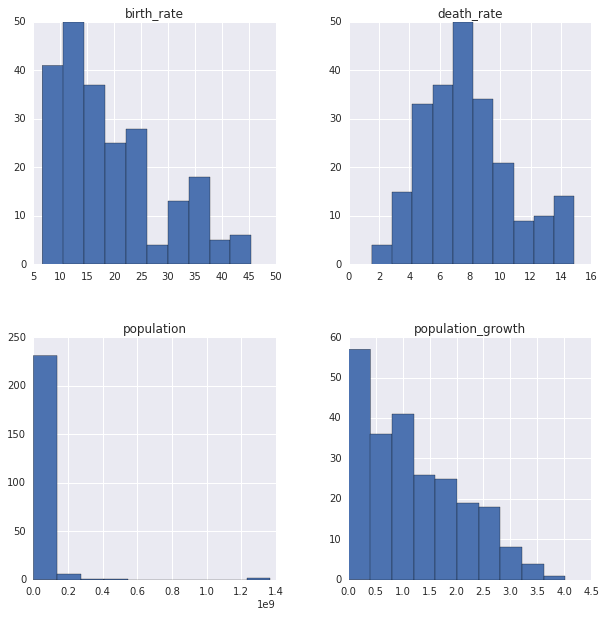

In [23]:
# Histograms!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q = "SELECT name, population, population_growth, birth_rate, death_rate FROM facts WHERE name NOT IN ('Antartica', 'World')"
df = pd.read_sql_query(q, conn)
df.hist(ax=ax)

In [29]:
# Highest Population Density (population / area)
q = "SELECT name, CAST(population AS Float)/CAST(area AS Float) pop_density FROM facts ORDER BY pop_density DESC LIMIT 10"
df_pop_den = pd.read_sql_query(q, conn)
df_pop_den

,name,pop_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



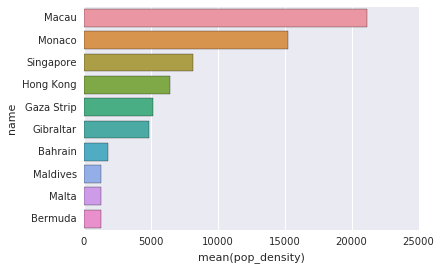

In [32]:
sns.barplot(data=df_pop_den, y='name', x='pop_density', orient='h')